In [13]:
# 4번 노드 프로젝트 미니 프로젝트 - 중고 자동차 가격 데이터 

!pip install scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
car_df = pd.read_csv('cars.csv')
brand_df = pd.read_csv('brand.csv')
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [15]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [16]:
# Engine, Emission Class 변수의 카테고리형 데이터를 숫자형으로 변환
import re

# Engine: '1.4L' -> 1.4, '2.0L' -> 2.0 등으로 변환
def extract_engine_size(engine_str):
    if pd.isnull(engine_str):
        return None
    match = re.search(r'(\d+\.?\d*)', str(engine_str))
    if match:
        return float(match.group(1))
    return None

merged_df['Engine_num'] = merged_df['Engine'].apply(extract_engine_size)

# Emission Class: 'Euro 4' -> 4, 'Euro 6' -> 6 등으로 변환
def extract_euro_class(emission_str):
    if pd.isnull(emission_str):
        return None
    match = re.search(r'Euro (\d+)', str(emission_str))
    if match:
        return int(match.group(1))
    return None

merged_df['Emission_num'] = merged_df['Emission Class'].apply(extract_euro_class)

# 변환 결과 확인
merged_df[['Engine', 'Engine_num', 'Emission Class', 'Emission_num']].head()

,Engine,Engine_num,Emission Class,Emission_num
0,1.4L,1.4,Euro 6,6.0
1,1.2L,1.2,Euro 4,4.0
2,1.4L,1.4,Euro 5,5.0
3,1.4L,1.4,Euro 4,4.0
4,1.3L,1.3,Euro 5,5.0


In [17]:
# Service history 변수의 결측치는 'Unknown'으로 채우기
merged_df['Service history'] = merged_df['Service history'].fillna('Unknown')

# 결측치가 3개 이상인 행은 제거 (예시: 3개 기준, 필요시 숫자 조정)
row_na_count = merged_df.isnull().sum(axis=1)
cleaned_df = merged_df[row_na_count < 3].copy()

# 결측치 처리 결과 확인
print('원본 데이터 shape:', merged_df.shape)
print('결측치 제거 후 shape:', cleaned_df.shape)
cleaned_df.head()

원본 데이터 shape: (3687, 18)
결측치 제거 후 shape: (3609, 18)


,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,title_y,country,Engine_num,Emission_num
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,skoda,skoda,Czech Republic,1.4,6.0
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,vauxhall,United Kingdom,1.2,4.0
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,hyundai,hyundai,South Korea,1.4,5.0
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,mini,United Kingdom,1.4,4.0
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,vauxhall,vauxhall,United Kingdom,1.3,5.0


In [18]:
# Scaler와 PCA를 활용한 주성분 추출
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 분석에 사용할 수치형 변수 선택 (예시: Price, Mileage, Registration_Year, Engine_num, Emission_num 등)
num_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Engine_num', 'Emission_num']
pca_data = cleaned_df[num_cols].dropna()

# 스케일링
scaler = StandardScaler()
scaled = scaler.fit_transform(pca_data)

# PCA: 70% 이상 설명하는 최소 주성분 수 찾기
pca = PCA()
pca.fit(scaled)
cumsum = pca.explained_variance_ratio_.cumsum()
n_components = (cumsum >= 0.7).argmax() + 1
print(f'70% 이상 설명하는 최소 주성분 개수: {n_components}')

# 해당 개수로 PCA 변환
pca_final = PCA(n_components=n_components)
principal_components = pca_final.fit_transform(scaled)

# 결과 DataFrame 생성 및 확인
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df.head()

70% 이상 설명하는 최소 주성분 개수: 2


,PC1,PC2
0,1.408748,-0.099380
1,-1.321665,-1.230260
2,-1.019331,-0.304427
3,-1.163305,-0.690904
4,-0.243661,-0.841834


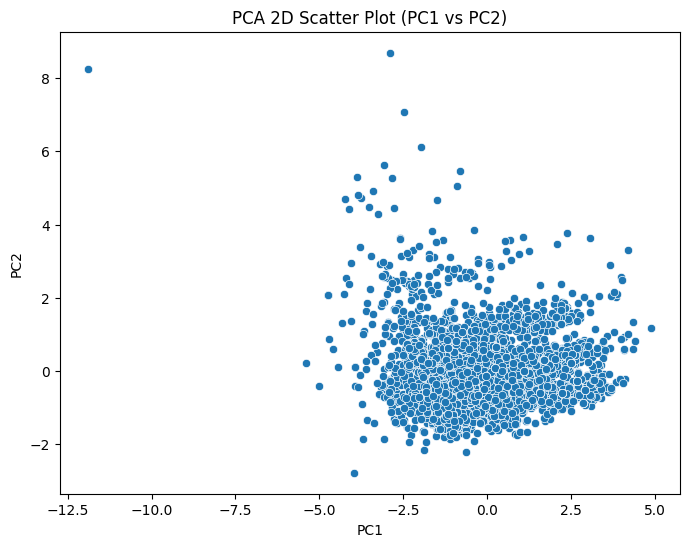

In [19]:
# PCA 결과 시각화 (2D)
import matplotlib.pyplot as plt
import seaborn as sns

# 2D 산점도 (PC1 vs PC2)
if pca_df.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df)
    plt.title('PCA 2D Scatter Plot (PC1 vs PC2)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

In [20]:
# 국가별 총 브랜드 개수
brand_count_by_country = brand_df.groupby('country')['title'].nunique().sort_values(ascending=False)
print(brand_count_by_country)

country
Japan             11
United Kingdom     8
Germany            6
United States      5
France             4
Italy              4
South Korea        4
Sweden             2
Czech Republic     1
Malaysia           1
Romania            1
Spain              1
Name: title, dtype: int64


In [21]:
# cars.csv의 title에서 브랜드명 추출
car_df['brand'] = car_df['title'].str.split().str[0].str.lower()

# brand.csv의 브랜드명 컬럼명도 소문자로 맞추기
brand_df['title'] = brand_df['title'].str.lower()

# 병합
merged_df = pd.merge(car_df, brand_df, how='left', left_on='brand', right_on='title')

# 결과 확인
merged_df[['title_x', 'Price', 'brand', 'country']].head()

,title_x,Price,brand,country
0,SKODA FABIA,6900,skoda,Czech Republic
1,VAUXHALL CORSA,1495,vauxhall,United Kingdom
2,HYUNDAI I30,949,hyundai,South Korea
3,MINI HATCH,2395,mini,United Kingdom
4,VAUXHALL CORSA,1000,vauxhall,United Kingdom


                      Price  Mileage(miles)  Registration_Year  Engine_num  \
Price              1.000000       -0.502463           0.775481   -0.025460   
Mileage(miles)    -0.502463        1.000000          -0.442309    0.333814   
Registration_Year  0.775481       -0.442309           1.000000   -0.298682   
Engine_num        -0.025460        0.333814          -0.298682    1.000000   
Emission_num       0.697992       -0.378377           0.920095   -0.264197   

                   Emission_num  
Price                  0.697992  
Mileage(miles)        -0.378377  
Registration_Year      0.920095  
Engine_num            -0.264197  
Emission_num           1.000000  


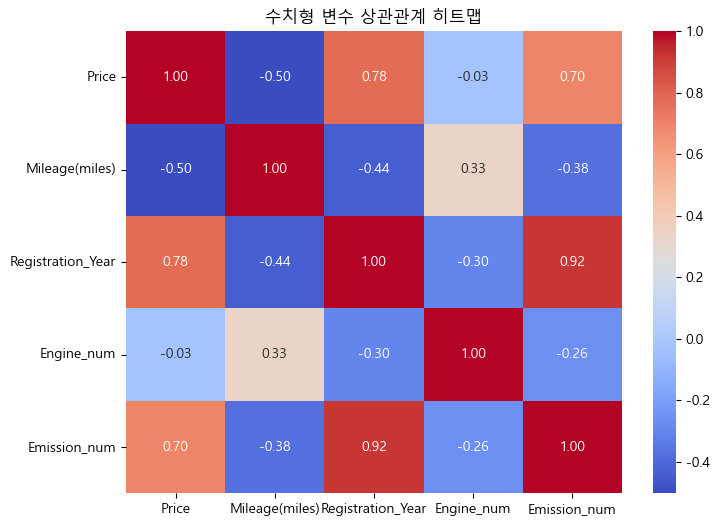

In [23]:
# 수치형 변수들의 상관관계 분석 및 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 한글 폰트 설정 (Windows: Malgun Gothic, Arial 등)
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

numeric_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Engine_num', 'Emission_num']
corr = cleaned_df[numeric_cols].corr()
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('수치형 변수 상관관계 히트맵')
plt.show()